In [1]:
import numpy as np

X = np.load('../datasets/topicos_cc/X.npy')
X_selected_features = np.load('../datasets/topicos_cc/X_selected_features.npy')
y = np.load('../datasets/topicos_cc/y.npy')

X.shape, y.shape

((792, 40), (792,))

In [2]:
import matplotlib.pyplot as plt

def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(h.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import L1L2
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
y_categorical = to_categorical(y, num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y_categorical, test_size=0.3, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((554, 8), (238, 8), (554, 10), (238, 10))

In [5]:
def create_model(learning_rate=0.001, l1_regularization=0.01, l2_regularization=0.01, dropout_rate=0.2):
    optimizer = Adam(learning_rate=learning_rate)
    regularizer = L1L2(l1=l1_regularization, l2=l2_regularization)

    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/50
70/70 [==============================] - 1s 8ms/step - loss: 2.3927 - accuracy: 0.2653 - val_loss: 2.1510 - val_accuracy: 0.3067
Epoch 2/50
70/70 [==============================] - 0s 4ms/step - loss: 1.9909 - accuracy: 0.3773 - val_loss: 1.8803 - val_accuracy: 0.4034
Epoch 3/50
70/70 [==============================] - 0s 4ms/step - loss: 1.8304 - accuracy: 0.4386 - val_loss: 1.7769 - val_accuracy: 0.4538
Epoch 4/50
70/70 [==============================] - 0s 4ms/step - loss: 1.7187 - accuracy: 0.4729 - val_loss: 1.7478 - val_accuracy: 0.4496
Epoch 5/50
70/70 [==============================] - 0s 4ms/step - loss: 1.6950 - accuracy: 0.4693 - val_loss: 1.7371 - val_accuracy: 0.4454
Epoch 6/50
70/70 [==============================] - 0s 3ms/step - loss: 1.6143 - accuracy: 0.5181 - val_loss: 1.6313 - val_accuracy: 0.4916
Epoch 7/50
70/70 [==============================] - 0s 3ms/step - loss: 1.5811 - accuracy: 0.5253 - val_loss: 1.5944 - val_accuracy: 0.5210
Epoch 8/50
70/70 [==

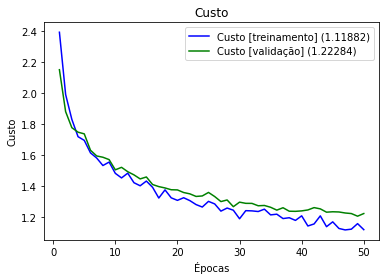

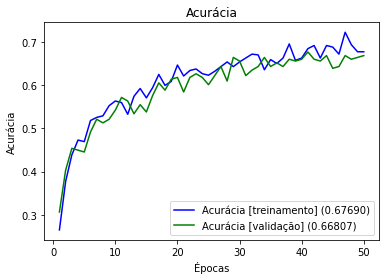

In [53]:
params = { 'learning_rate': 0.003, 'l1_regularization': 0.001, 'l2_regularization': 0.001, 'dropout_rate': 0.01, 'batch_size': 8, 'epochs': 50 }

model = create_model(learning_rate=params['learning_rate'], l1_regularization=params['l1_regularization'], l2_regularization=params['l2_regularization'])
history = model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)
plot_history(history)